In [0]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = mnist_data()
X, y = shuffle_arrays_unison((X, y), random_seed=1)
X_train, y_train = X[:500], y[:500]
X_test, y_test = X[500:], y[500:]

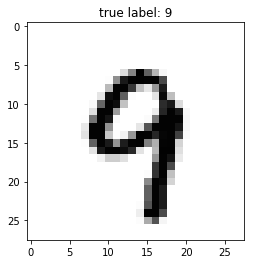

In [2]:
import matplotlib.pyplot as plt

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

plot_digit(X, y, 3500)  

In [0]:
import numpy as np
from mlxtend.preprocessing import standardize

X_train_std, params = standardize(X_train, 
                                  columns=range(X_train.shape[1]), 
                                  return_params=True)

X_test_std = standardize(X_test,
                         columns=range(X_test.shape[1]),
                         params=params)

In [5]:
from mlxtend.classifier import MultiLayerPerceptron as MLP
nn1 = MLP(hidden_layers=[150], 
          l2=0.00, 
          l1=0.0, 
          epochs=100, 
          eta=0.005, 
          momentum=0.0,
          decrease_const=0.0,
          minibatches=100, 
          random_seed=1,
          print_progress=3)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 100/100 | Cost 0.01 | Elapsed: 0:00:19 | ETA: 0:00:00

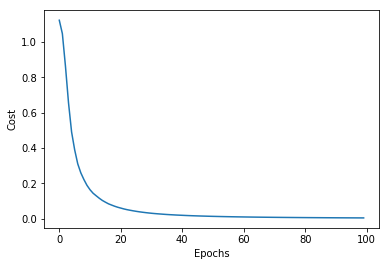

In [6]:
import matplotlib.pyplot as plt

nn1.fit(X_train_std, y_train)

plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [7]:
print('Train Accuracy: %.2f%%' % (100 * nn1.score(X_train_std, y_train)))
print('Test Accuracy: %.2f%%' % (100 * nn1.score(X_test_std, y_test)))

Train Accuracy: 100.00%
Test Accuracy: 84.62%
